In [1]:
import scipy.io as spio
import numpy as np
import sys, os

import matplotlib.pyplot as plt
import math

In [2]:
def convert_data2org(cur_mat, maxV = 25.0):
    import numpy as np
    # cur_mat = cur_mat * maxV;
    x = np.exp(cur_mat) - 1.0;

    #print "\nmin \t max"
    #print np.amin(x), np.amax(x)

    neg_idx = x < 0.0
    x[neg_idx] = 0.0

    #print "\nmin \t max"
    #print np.amin(x), np.amax(x)
    
    return x

def plot_results(noisy, nn_output, clean, title=None):
    import numpy as np
    plt.figure(1, figsize=(20,20))
    #if title: plt.suptitle(title, fontsize=16)

    ax = plt.subplot(1, 3, 1)
    ax.set_title("noisy")
    # ax.imshow(np.log10(noisy), clim=(-3,7), interpolation='none')
    ax.imshow(np.log10(noisy), interpolation='none')
        
    ax = plt.subplot(1, 3, 2)
    ax.set_title("Neural Nets")
    # ax.imshow(np.log10(nn_output), clim=(-3,7), interpolation='none')
    ax.imshow(np.log10(nn_output), interpolation='none')
    
    ax = plt.subplot(1, 3, 3)
    ax.set_title("clean")
    # ax.imshow(np.log10(clean), clim=(-3,7), interpolation='none')
    ax.imshow(np.log10(clean), interpolation='none')

    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.9, top=0.88, wspace=0.2, hspace=0.2)
    #plt.subplot_tool()
    plt.show()

### homo

In [3]:
def compute_snr(matfile):
    dat_px = spio.loadmat(matfile, squeeze_me=True)
    dat_px = dat_px['data']

    # each data array is 4D tensor (x , y, z, samples)
    samples = dat_px.shape[-1]
    
    snr_array = np.zeros((samples, 100), dtype=np.float32)
    
    for i in xrange(samples):
        img50 = dat_px[:,49,:,i]  # for current example, take the 50 image along the y-axis
        vect_mid = img50[49,:]
        snr_array[i,:] = vect_mid

    means = np.mean(snr_array, axis=0)
    stds  = np.std(snr_array, axis=0)
    snr_result = 20. * np.log10(means / stds)
    
    return snr_result

In [4]:
snr_dir = '/space/neza/2/users/yaoshen/NEU/Research/MRI filtering/mcxlab_nightlybuild/data'

In [5]:
#
# read snr data set
#

p5_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_homo_1e5_pack1.mat')
p6_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_homo_1e6_pack1.mat')
p7_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_homo_1e7_pack1.mat')
p8_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_homo_1e8_pack1.mat')

In [6]:
# for i in p5_snr: print i
# for i in p6_snr: print i
# for i in p7_snr: print i
# for i in p8_snr: print i

### NN model output

In [7]:
def compute_snr_from_array(nn_hom1e5):
    [samples, im_w, im_h] = nn_hom1e5.shape
    snr_array = np.zeros((samples, im_h), dtype=np.float32)

    for i in xrange(samples):
        vect_mid = nn_hom1e5[i,49,:]  # take the 50th vector of 100x100
        snr_array[i,:] = vect_mid  # save 100

    means = np.mean(snr_array, axis=0)
    stds  = np.std(snr_array, axis=0)
    
#     log_array = np.log(snr_array)
#     log_means = np.mean(log_array, axis=0)
#     log_std   = np.std(log_array, axis=0)
#     print "\n log_means"
#     for i in log_means: print i
#     print "\nlog_std"
#     for i in log_std: print i
        
#    log10_array = np.log10(snr_array)
#    log10_means = np.mean(log10_array, axis=0)
#    log10_std   = np.std(log10_array, axis=0)
#    print "\n log10_means"
#    for i in log10_means: print i
#    print "\nlog10_std"
#    for i in log10_std: print i
        
        
    snr_result = 20. * np.log10(means / stds)
    
    return snr_result

In [8]:
nn_hom1e5 = spio.loadmat('../test_results/snr_hom1e5_nn.mat', squeeze_me=True)
nn_hom1e5 = nn_hom1e5['output_clean']
print nn_hom1e5.shape
nn_hom1e5 = convert_data2org(nn_hom1e5) # convert back to original format

nn_snr = compute_snr_from_array(nn_hom1e5)

(100, 100, 100)


In [9]:
# for i in nn_snr: print i

### absorber3

In [10]:
#
# read snr data set
#
p5_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_absorber3_1e5_pack1.mat')
p6_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_absorber3_1e6_pack1.mat')
p7_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_absorber3_1e7_pack1.mat')
p8_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_absorber3_1e8_pack1.mat')

In [11]:
# for i in p5_snr: print i
# for i in p6_snr: print i
# for i in p7_snr: print i
# for i in p8_snr: print i

In [12]:
#
# neural nets
#
nn_result = spio.loadmat('../test_results/snr_absorb1e5_nn.mat', squeeze_me=True)
nn_result = nn_result['output_clean']
print nn_result.shape
nn_result = convert_data2org(nn_result) # convert back to original format

nn_snr = compute_snr_from_array(nn_result)

(100, 100, 100)


In [13]:
for i in nn_snr: print i

32.484505
37.253654
40.104218
34.602787
39.10844
45.46308
43.88653
46.482475
46.19202
45.305984
43.67154
43.83495
42.717594
43.025288
41.451263
38.57426
38.792175
37.09867
33.99507
30.363808
29.053877
26.567059
28.524313
28.77317
18.828382
7.3664145
5.3205833
8.087983
6.807357
9.726449
11.729525
13.022802
14.578936
17.60588
17.270565
15.457146
16.2427
17.731268
19.155512
21.311348
23.930828
27.190027
30.757698
35.549416
40.105457
45.059135
48.853493
52.821365
56.00662
59.616695
62.848145
66.065056
68.909805
70.49713
71.36894
72.39248
73.33335
74.994316
76.16336
77.91539
78.88965
80.29082
81.268394
83.19859
85.205
88.09628
90.71448
93.814964
97.53995
99.400925
102.41693
103.51416
106.434525
105.80688
105.36627
104.03855
103.817505
104.05857
104.118355
106.7079
108.32496
110.40984
115.70255
118.88443
117.60573
122.78023
121.54335
122.333115
118.823425
119.00481
121.59036
126.33437
121.40335
123.10378
124.62727
126.26176
120.84096
122.80258
123.80937
124.14905


### refractive

In [14]:
#
# read snr data set
#
p5_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_refractive_1e5_pack1.mat')
p6_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_refractive_1e6_pack1.mat')
p7_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_refractive_1e7_pack1.mat')
p8_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_refractive_1e8_pack1.mat')

In [15]:
# for i in p5_snr: print i
# for i in p6_snr: print i
# for i in p7_snr: print i
# for i in p8_snr: print i

In [16]:
#
# neural nets
#
nn_result = spio.loadmat('../test_results/snr_refractive1e5_nn.mat', squeeze_me=True)
nn_result = nn_result['output_clean']
print nn_result.shape
nn_result = convert_data2org(nn_result) # convert back to original format

nn_snr = compute_snr_from_array(nn_result)

(100, 100, 100)


In [17]:
# for i in nn_snr: print i

### show image 

(100, 100, 100)


/home/users/leiming/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10


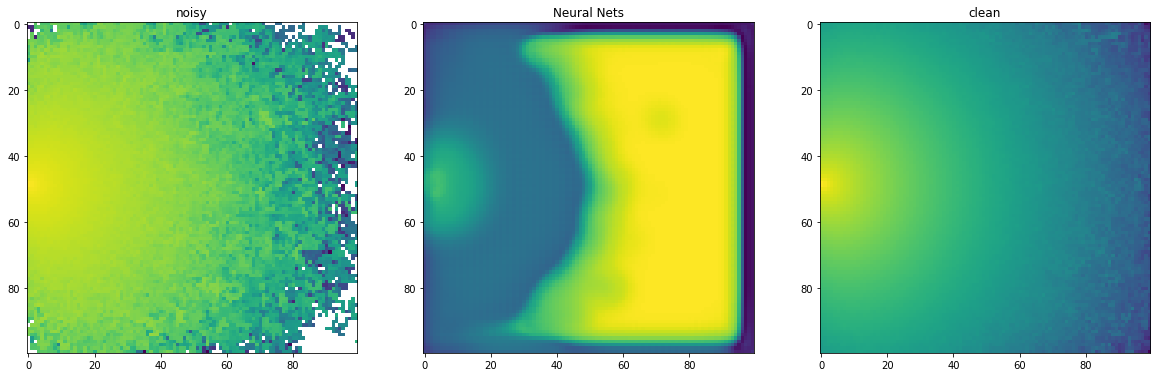

In [18]:
# =====================
#  homo
# =====================
noisy_mat = spio.loadmat(snr_dir + '/journal2_50ns_vol100_homo_1e5_pack1.mat', squeeze_me=True)
noisy_mat = noisy_mat['data']
noisy_img = noisy_mat[:,49,:,0]  # 100x100


clean_mat = spio.loadmat(snr_dir + '/journal2_50ns_vol100_homo_1e8_pack1.mat', squeeze_me=True)
clean_mat = clean_mat['data']
clean_img = clean_mat[:,49,:,0]  # 100x100


nn_hom1e5 = spio.loadmat('../test_results/snr_hom1e5_nn.mat', squeeze_me=True)
nn_hom1e5 = nn_hom1e5['output_clean']
print nn_hom1e5.shape
nn_img = convert_data2org(nn_hom1e5) # convert back to original format
nn_img = nn_img[0,...]

plot_results(noisy_img, nn_img, clean_img)